# Unidentified anomalous phenomenon - Descriptive AI 


Can you link sightings? assume that  a spaceship on Earth can go top 4 times the speed of sound 
and the visitors are for a weekend and to three stops.


In [1]:
from sklearn.cluster import KMeans
import numpy as np
import folium
import pandas as pd
import os
import matplotlib.pyplot as plt
import oci
#
os.chdir('/Users/46763/Desktop/Project/ufo')
# Specify your Oracle Cloud credentials
config = {
    "user": "YOUR_USER_OCID",
    "key_file": "path_to_private_key_file",
    "fingerprint": "YOUR_API_KEY_FINGERPRINT",
    "tenancy": "YOUR_TENANCY_OCID",
    "region": "YOUR_REGION"
}

## Data Preprocessing*
Read excel file and romove bad data and make small dataset 

In [3]:
#unidentified_anomalous_phenomenon = pd.read_csv('unidentified_anomalous_phenomenon.csv')

unidentified_anomalous_phenomenon = pd.read_excel('excel_unidentified_anomalous_phenomenon.xlsx')
#fix columns
unidentified_anomalous_phenomenon.columns =  unidentified_anomalous_phenomenon.columns.str.replace(r'\W+', '', regex=True)
unidentified_anomalous_phenomenon.rename(columns={'Kolumn1': 'UAP_spotime'}, inplace=True)

In [4]:
unidentified_anomalous_phenomenon.head (3)

,UAP_spotime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667


In [5]:
# Clean stuff
unidentified_anomalous_phenomenon['latitude'] = pd.to_numeric(unidentified_anomalous_phenomenon['latitude'], errors='coerce')# Remove rows with NaN values in the 'latitude' column
unidentified_anomalous_phenomenon = unidentified_anomalous_phenomenon.dropna(subset=['latitude'])
# Filter rows where latitude is between -89 and +89
unidentified_anomalous_phenomenon = unidentified_anomalous_phenomenon[(unidentified_anomalous_phenomenon['latitude'] > -90) & (unidentified_anomalous_phenomenon['latitude'] < 90 )]



In [6]:

unidentified_anomalous_phenomenon_1klast = unidentified_anomalous_phenomenon.tail(1000)
#Trim column names to only include alphanumeric characters (a to z and 0 to 9)
unidentified_anomalous_phenomenon.columns = [''.join(filter(str.isalnum, col)) for col in unidentified_anomalous_phenomenon.columns]


Text(0.5, 1.0, 'Histogram of Latitude')

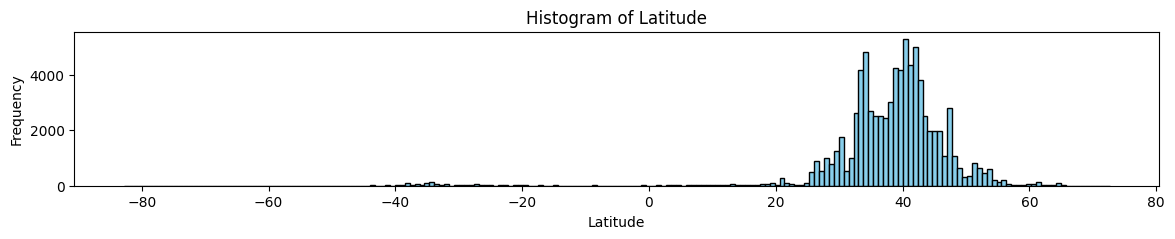

In [7]:
# Plot histogram for the 'latitude' column
plt.figure(figsize=(14, 2))
plt.hist(unidentified_anomalous_phenomenon['latitude'], bins=200, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')

## Feature Engineering:
Change +/- 90 to 0-180 and time into days from start. 
Then add 0-1 value, ratio. 

In [8]:
unidentified_anomalous_phenomenon.head (3)

,UAPspotime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667


Text(0.5, 1.0, 'Histogram of UAP_daysstartstop')

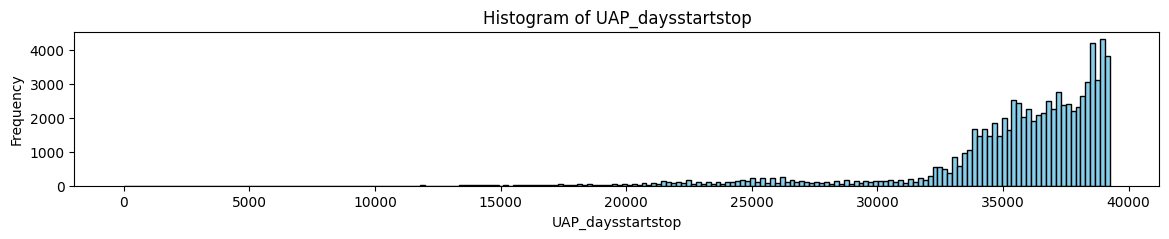

In [9]:
# Find the minimum date in the datetime column
min_date = unidentified_anomalous_phenomenon['UAPspotime'].min()
unidentified_anomalous_phenomenon['UAP_daysstartstop'] = (unidentified_anomalous_phenomenon['UAPspotime'] - min_date).dt.days
# Plot histogram for the 'latitude' column
plt.figure(figsize=(14, 2))
plt.hist(unidentified_anomalous_phenomenon['UAP_daysstartstop'], bins=200, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('UAP_daysstartstop')
plt.ylabel('Frequency')
plt.title('Histogram of UAP_daysstartstop')

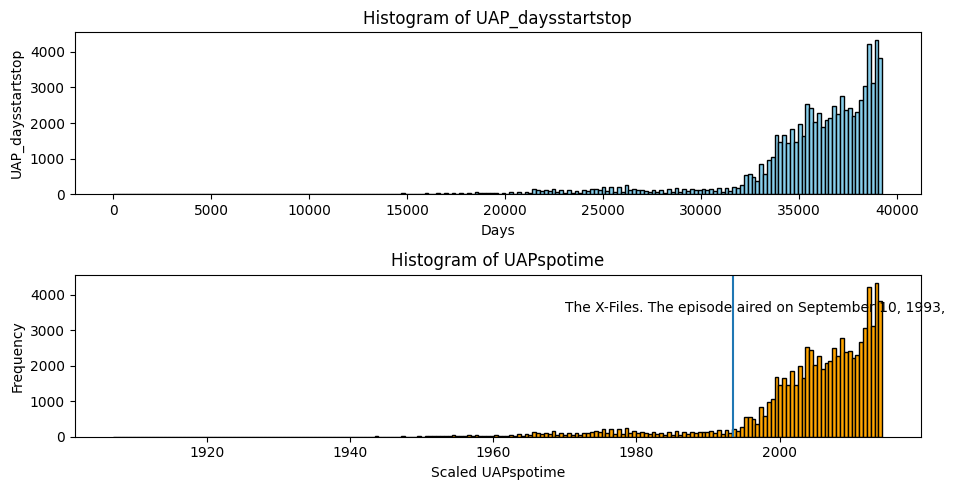

In [10]:
# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Subplot for the 'latitude' column
plt.subplot(2, 1, 1)
plt.hist(unidentified_anomalous_phenomenon['UAP_daysstartstop'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('UAP_daysstartstop')
plt.title('Histogram of UAP_daysstartstop')

# Subplot for the 'scaled_latitude' column
plt.subplot(2, 1, 2)
plt.hist(unidentified_anomalous_phenomenon['UAPspotime'], bins=200, color='orange', edgecolor='black')
plt.xlabel('Scaled UAPspotime')
plt.ylabel('Frequency')
plt.title('Histogram of UAPspotime')

# Add vertical line
#plt.axvline(x=0.1, color='red', linestyle='--')
plt.axvline(x=8600)
# Add text annotation
plt.text(29, 3500, 'The X-Files. The episode aired on September 10, 1993, ')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

"Närkontakt av tredje graden" (Close Encounters of the Third Kind) - 1977
"ET - den lilla utomjordingen" (E.T. the Extra-Terrestrial) - 1982
"Independence Day" - 1996
"War of the Worlds" (filmatiseringar inklusive Steven Spielbergs version från 2005) - År 2005 för Spielbergs version
"The X-Files" (TV-serie) - 1993-2002
"The War of the Worlds" (radioprogram av Orson Welles) - 1938

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Extract latitude and longitude columns
latitude_longitude_data = unidentified_anomalous_phenomenon[['latitude', 'longitude']]

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(latitude_longitude_data)

# Create a DataFrame with scaled latitude and longitude
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_latitude', 'scaled_longitude'])

# Concatenate the scaled DataFrame with the original DataFrame
unidentified_anomalous_phenomenon = pd.concat([unidentified_anomalous_phenomenon, scaled_df], axis=1)

# Print the result
unidentified_anomalous_phenomenon.head (3)

,UAPspotime,city,state,country,shape,durationseconds,durationhoursmin,comments,dateposted,latitude,longitude,UAP_daysstartstop,scaled_latitude,scaled_longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,15674.0,0.724761,0.221675
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,15674.0,0.721554,0.219873
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,17865.0,0.874649,0.489275


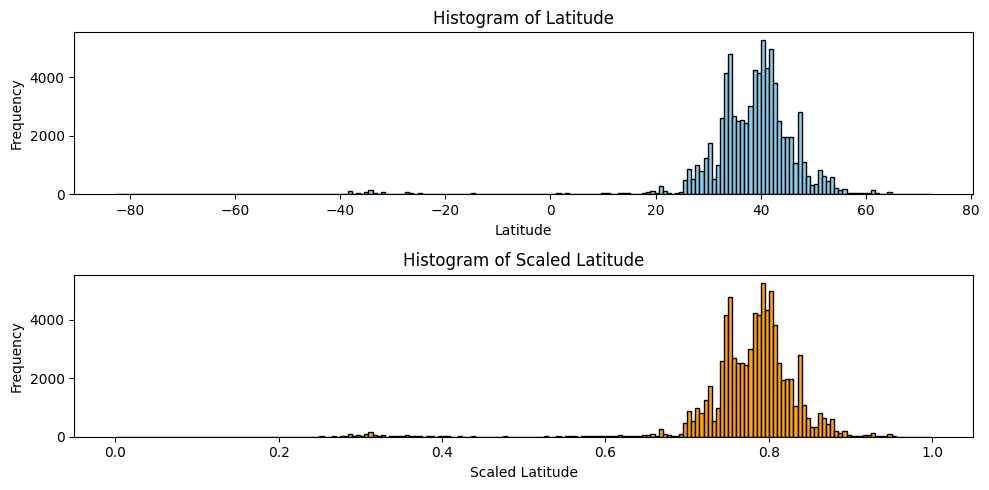

In [94]:
# Create a figure with two subplots
plt.figure(figsize=(10, 5))

# Subplot for the 'latitude' column
plt.subplot(2, 1, 1)
plt.hist(unidentified_anomalous_phenomenon['latitude'], bins=200, color='skyblue', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')

# Subplot for the 'scaled_latitude' column
plt.subplot(2, 1, 2)
plt.hist(unidentified_anomalous_phenomenon['scaled_latitude'], bins=200, color='orange', edgecolor='black')
plt.xlabel('Scaled Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Latitude')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [ ]:
# Plot histogram for the 'latitude' column
plt.hist(unidentified_anomalous_phenomenon['latitude'], bins=200, color='skyblue', edgecolor='black')
# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')

In [53]:
unidentified_anomalous_phenomenon.dtypes 

Kolumn1             datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
durationseconds            float64
durationhoursmin            object
comments                    object
dateposted          datetime64[ns]
latitude                   float64
longitude                  float64
dtype: object

In [55]:
# Add markers to the map for each point in the DataFrame
for index, row in unidentified_anomalous_phenomenon_1klast.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=f'Point {index+1}').add_to(mymap)

# Save the map to an HTML file
mymap.save('markers_map.html')

In [44]:


# Haversine distance function for computing distances between two points on Earth's surface
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Sample data: list of (latitude, longitude, timestamp) tuples representing vehicle locations and timestamps
vehicle_data = [
    (40.7128, -74.0060, 1),  # Example latitude and longitude coordinates for New York City
    (34.0522, -118.2437, 2), # Example latitude and longitude coordinates for Los Angeles
    (40.7128, -74.0060, 3),
    (37.7749, -122.4194, 4), # Example latitude and longitude coordinates for San Francisco
    (34.0522, -118.2437, 5),
    (40.7128, -74.0060, 6),
]

# Extract spatial coordinates for clustering
spatial_coords = np.array([(lat, lon) for lat, lon, _ in vehicle_data])

# Perform K-means clustering
num_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(spatial_coords)

# Retrieve cluster centers
cluster_centers = kmeans.cluster_centers_

# Map each vehicle to its nearest cluster center
cluster_assignments = kmeans.predict(spatial_coords)

# Create a folium map centered on the mean latitude and longitude of the data points
mean_lat = np.mean(spatial_coords[:, 0])
mean_lon = np.mean(spatial_coords[:, 1])
mymap = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)

# Add cluster markers to the map
colors = ['red', 'blue', 'green', 'orange', 'purple', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen']
for i, center in enumerate(cluster_centers):
    folium.Marker(location=[center[0], center[1]], popup=f'Cluster {i+1}', icon=folium.Icon(color=colors[i%len(colors)])).add_to(mymap)

# Add vehicle markers to the map
for i, vehicle in unidentified_anomalous_phenomenon_1klast.iterrows():
    folium.Marker(location=[vehicle['latitude'], vehicle['longitude']], popup=f'Vehicle {i+1}', icon=folium.Icon(color='gray')).add_to(mymap)

# Save the map to an HTML file
mymap.save('clusters_map.html')


C:\Users\46763\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'longitude'

In [4]:
130000*12


1560000

In [2]:
sqr(6)

NameError: name 'sqr' is not defined

In [3]:
np.sqr(6)

NameError: name 'np' is not defined